In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/worlds-wildlife/yields-of-important-staple-crops new.csv


Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Inspections

In [3]:
data = pd.read_csv('/kaggle/input/worlds-wildlife/yields-of-important-staple-crops new.csv')

In [4]:
data.head(10)

,country,code country,Year,Maize yield
0,United Kingdom,GBR,1275,0
1,United Kingdom,GBR,1305,0
2,United Kingdom,GBR,1355,0
3,United Kingdom,GBR,1405,0
4,United Kingdom,GBR,1455,0
5,United Kingdom,GBR,1555,0
6,United Kingdom,GBR,1605,0
7,United Kingdom,GBR,1655,0
8,United Kingdom,GBR,1705,0
9,United Kingdom,GBR,1755,0


In [5]:
data.tail(10)

,country,code country,Year,Maize yield
13539,Venezuela,VEN,2022,3.5946
13540,Vietnam,VNM,2022,4.9954
13541,Western Africa (FAO),0,2022,2.0574
13542,Western Asia (FAO),0,2022,8.1596
13543,Western Europe (FAO),0,2022,7.9283
13544,World,OWID_WRL,2022,5.7183
13545,Yemen,YEM,2022,1.1429
13546,Zambia,ZMB,2022,2.4261
13547,Zimbabwe,ZWE,2022,1.5
13548,United States,USA,2023,11.127.799


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country       13549 non-null  object
 1   code country  13549 non-null  object
 2   Year          13549 non-null  int64 
 3   Maize yield   13501 non-null  object
dtypes: int64(1), object(3)
memory usage: 423.5+ KB


Data Cleaning

In [7]:
# check missing values 

missing_values = data.isnull().sum()

In [8]:
missing_values

country          0
code country     0
Year             0
Maize yield     48
dtype: int64

In [9]:
# check duplicates

duplicates_rows = data[data.duplicated()]

In [10]:
duplicates_rows

,country,code country,Year,Maize yield


In [11]:
# Remove NaN Values

wildlife = data.dropna()

In [12]:
wildlife

,country,code country,Year,Maize yield
0,United Kingdom,GBR,1275,0
1,United Kingdom,GBR,1305,0
2,United Kingdom,GBR,1355,0
3,United Kingdom,GBR,1405,0
4,United Kingdom,GBR,1455,0
...,...,...,...,...
13544,World,OWID_WRL,2022,5.7183
13545,Yemen,YEM,2022,1.1429
13546,Zambia,ZMB,2022,2.4261
13547,Zimbabwe,ZWE,2022,1.5


Summary Statistics

In [13]:
wildlife.describe()

,Year
count,13501.000000
mean,1991.505222
std,23.801803
min,1275.000000
25%,1977.000000
50%,1993.000000
75%,2008.000000
max,2023.000000


In [14]:
data.columns

Index(['country', 'code country', 'Year', 'Maize yield'], dtype='object')

In [15]:
min_wildlife = data['country'].min()
print("Wildlife Min Value For Country :", min_wildlife)

Wildlife Min Value For Country : Afghanistan


In [19]:
min_year_wildlife = data['Year'].min()
print("Wildlife Min Value For Year :", min_year_wildlife)

Wildlife Min Value For Year : 1275


In [20]:
median_year_wildlife = data['Year'].median()
print("Wildlife Median Value For Year :", median_year_wildlife)

Wildlife Median Value For Year : 1993.0


In [21]:
max_year_wildlife = data['Year'].max()
print("Wildlife Max Value For Year :", max_year_wildlife)

Wildlife Max Value For Year : 2023


In [22]:
std_year_wildlife = data['Year'].std()
print("Wildlife Standard Value For Year :", std_year_wildlife)

Wildlife Standard Value For Year : 24.04396544271429


In [23]:
count_year_wildlife = data['Year'].count()
print("Wildlife Count Value For Year :", count_year_wildlife)

Wildlife Count Value For Year : 13549


In [24]:
data['country'].value_counts()

country
United States            158
United Kingdom            83
Greece                    65
Spain                     65
Romania                   65
                        ... 
Montenegro                17
Serbia                    17
Serbia and Montenegro     14
South Sudan               11
Sudan                     11
Name: count, Length: 241, dtype: int64

In [25]:
data['code country'].value_counts()

code country
0           2603
USA          158
GBR           83
HUN           65
ROU           65
            ... 
MNE           17
SRB           17
OWID_SRM      14
SSD           11
SDN           11
Name: count, Length: 198, dtype: int64

In [26]:
data['Year'].value_counts()

Year
2000    230
2001    230
2002    230
2003    230
2004    230
       ... 
1910      1
1913      1
1914      1
1915      1
2023      1
Name: count, Length: 172, dtype: int64

In [27]:
data['Maize yield'].value_counts()

Maize yield
0             1417
1              119
2               39
2.5             34
0.5             33
              ... 
14.517.077       1
21.636.999       1
41.215.997       1
37.201.998       1
11.127.799       1
Name: count, Length: 9942, dtype: int64

Data Visualization

In [28]:
data.columns

Index(['country', 'code country', 'Year', 'Maize yield'], dtype='object')

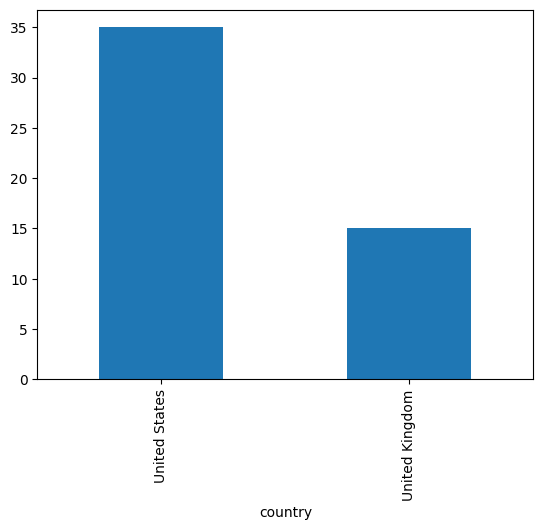

In [29]:
data['country'].head(50).value_counts().plot(kind='bar')
plt.show()

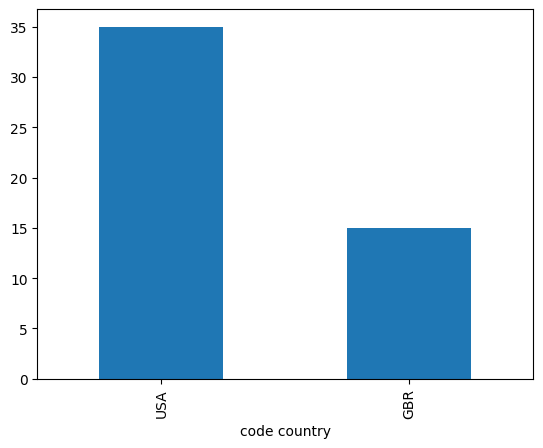

In [30]:
data['code country'].head(50).value_counts().plot(kind='bar')
plt.show()

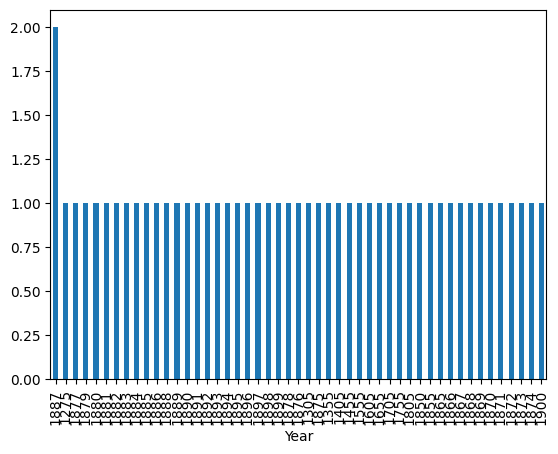

In [31]:
data['Year'].head(50).value_counts().plot(kind='bar')
plt.show()

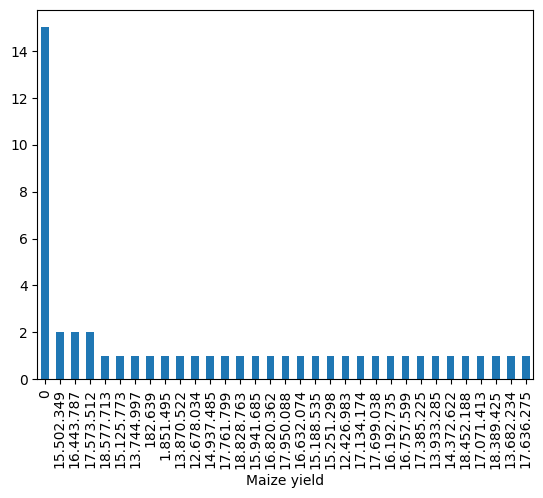

In [32]:
data['Maize yield'].head(50).value_counts().plot(kind='bar')
plt.show()

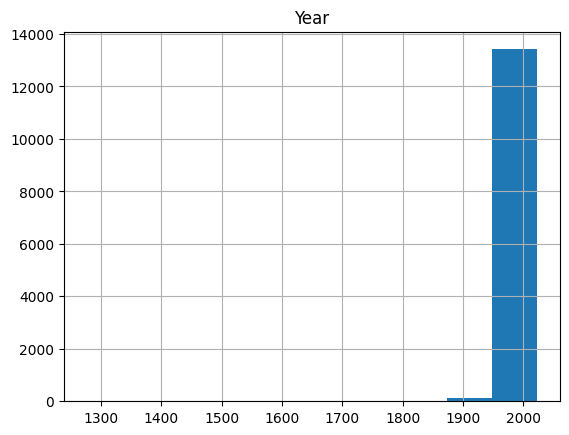

In [33]:
# histogram

data.hist()
plt.show()